In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

In [100]:
data = pd.read_csv("Bodyfat.csv")

In [101]:
data.shape

(252, 17)

In [102]:
df = data.iloc[:,1:data.shape[1]] # drop id column
cols = df.columns

BODYFAT      0
DENSITY      0
AGE          0
WEIGHT       0
HEIGHT       0
ADIPOSITY    0
NECK         0
CHEST        0
ABDOMEN      0
HIP          0
THIGH        0
KNEE         0
ANKLE        0
BICEPS       0
FOREARM      0
WRIST        0
dtype: int64

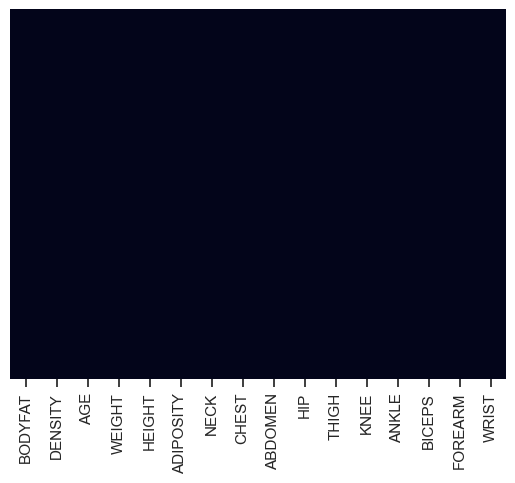

In [103]:
sns.heatmap(df.isnull(),yticklabels=False,cbar = False)
df.isnull().sum()

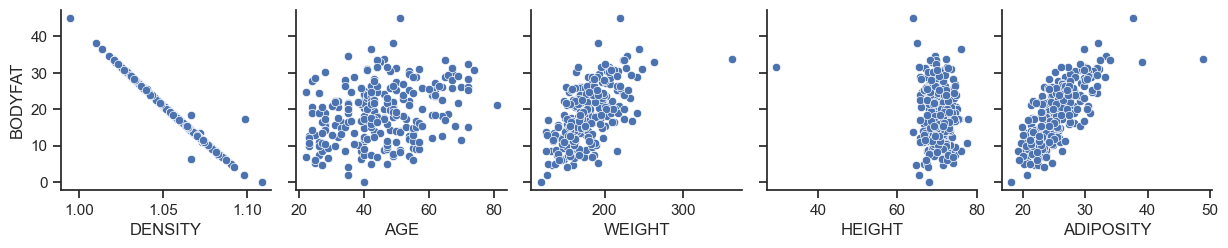

In [66]:
# feature VS bodyfat
sns.pairplot(df,x_vars = df.columns[1:6] ,y_vars=['BODYFAT'], kind="scatter")
plt.show()

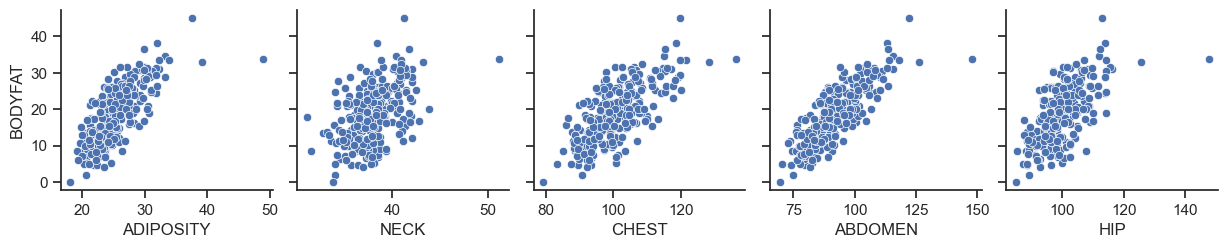

In [67]:
sns.pairplot(df,x_vars = df.columns[5:10] ,y_vars=['BODYFAT'], kind="scatter")
plt.show()

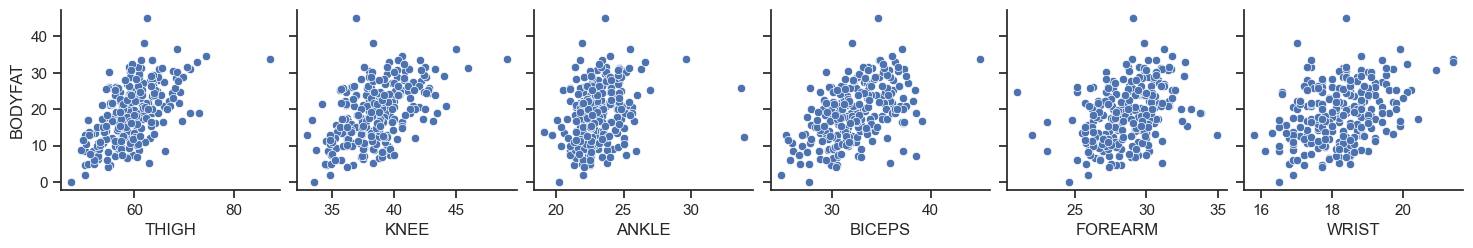

In [68]:
sns.pairplot(df,x_vars = df.columns[10:] ,y_vars=['BODYFAT'], kind="scatter")
plt.show()

array([[<Axes: title={'center': 'BODYFAT'}>,
        <Axes: title={'center': 'DENSITY'}>,
        <Axes: title={'center': 'AGE'}>,
        <Axes: title={'center': 'WEIGHT'}>],
       [<Axes: title={'center': 'HEIGHT'}>,
        <Axes: title={'center': 'ADIPOSITY'}>,
        <Axes: title={'center': 'NECK'}>,
        <Axes: title={'center': 'CHEST'}>],
       [<Axes: title={'center': 'ABDOMEN'}>,
        <Axes: title={'center': 'HIP'}>,
        <Axes: title={'center': 'THIGH'}>,
        <Axes: title={'center': 'KNEE'}>],
       [<Axes: title={'center': 'ANKLE'}>,
        <Axes: title={'center': 'BICEPS'}>,
        <Axes: title={'center': 'FOREARM'}>,
        <Axes: title={'center': 'WRIST'}>]], dtype=object)

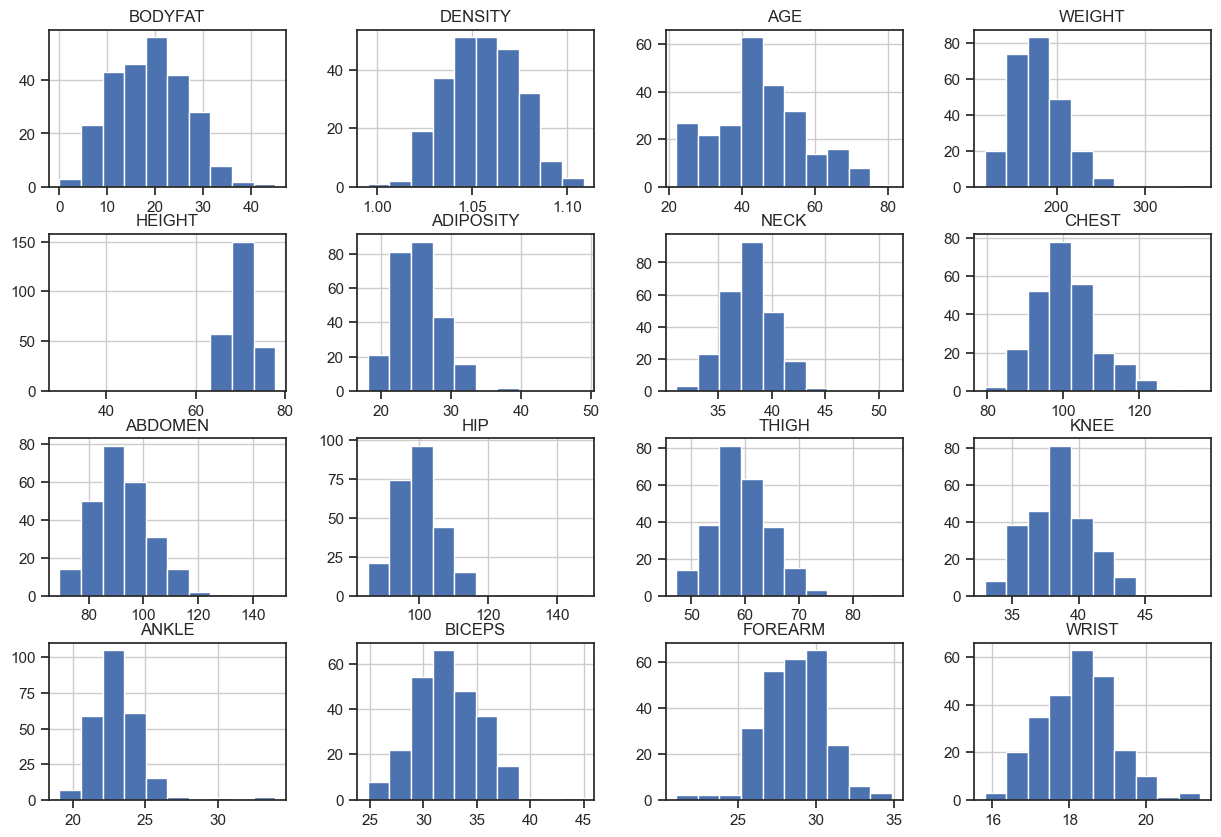

In [69]:
#sns.pairplot(df)
df.hist(figsize=(15, 10))

In [93]:
zscore = abs(scipy.stats.zscore(df))
zscore;

,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,0.819407,0.801647,1.740073,0.841246,0.656205,0.477058,0.738665,0.918048,0.683533,0.755929,0.077479,0.536131,0.710826,0.090676,0.626718,1.212541
1,1.556273,1.565061,1.819583,0.193462,0.574790,0.559456,0.209365,0.858621,0.887963,0.168502,0.134736,0.536131,0.175947,0.588143,0.117079,0.031943
2,0.731890,0.746240,1.819583,0.849769,1.066536,0.202398,1.645475,0.597144,0.432643,0.098570,0.037035,0.128592,0.530656,1.151940,1.717621,1.749177
3,1.039174,1.028039,1.501543,0.198617,0.574790,0.147466,0.244041,0.115976,0.572026,0.181157,0.132464,0.536131,0.178762,0.041982,0.365012,0.031943
4,1.145569,1.135844,1.660563,0.181570,0.301235,0.044796,1.480601,0.418864,0.691719,0.279061,0.724121,1.499585,0.530656,0.024347,0.477959,0.568578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,0.961609,0.949065,1.996904,1.523123,0.861370,1.191174,1.274507,1.381576,0.832209,1.553151,1.871535,1.574763,0.947298,2.213203,1.469689,0.290039
248,1.727306,1.683396,2.155924,0.752642,0.109096,1.006106,1.198613,0.912294,1.156332,0.642706,0.037035,0.917952,0.057711,0.970588,0.031680,2.007273
249,1.210207,1.199023,2.155924,0.266805,1.134925,1.308232,0.374239,1.221312,1.760328,0.251088,0.170635,0.536131,0.947298,0.322827,0.725891,0.246597
250,0.822382,0.825214,2.155924,0.403180,0.096070,0.429320,0.374239,0.888523,0.812518,0.294379,0.650050,1.250314,0.237880,0.588143,0.365012,1.685292


In [94]:
def outlier_detect(feature):
    outlier = df[zscore[feature]>3].index
    return outlier

outlier_dict = {}
for feature in cols[1:]:
    outlier_dict[feature] = outlier_detect(feature)
    
outlier_dict["BODYFAT"] = df[zscore["BODYFAT"]>2.3].index

outlier_dict

{'DENSITY': Int64Index([215], dtype='int64'),
 'AGE': Int64Index([], dtype='int64'),
 'WEIGHT': Int64Index([38], dtype='int64'),
 'HEIGHT': Int64Index([41], dtype='int64'),
 'ADIPOSITY': Int64Index([38, 40, 215], dtype='int64'),
 'NECK': Int64Index([38], dtype='int64'),
 'CHEST': Int64Index([38, 40], dtype='int64'),
 'ABDOMEN': Int64Index([38, 40], dtype='int64'),
 'HIP': Int64Index([38, 40], dtype='int64'),
 'THIGH': Int64Index([38], dtype='int64'),
 'KNEE': Int64Index([38, 243], dtype='int64'),
 'ANKLE': Int64Index([30, 38, 85], dtype='int64'),
 'BICEPS': Int64Index([38], dtype='int64'),
 'FOREARM': Int64Index([158, 174, 225], dtype='int64'),
 'WRIST': Int64Index([38, 40], dtype='int64'),
 'BODYFAT': Int64Index([35, 181, 215], dtype='int64')}

In [95]:
def outlier_replace(feature):
    if len(outlier_dict[feature]) != 0: 
        for i in range(0,len(outlier_dict[feature])):
            
            outlier_index = outlier_dict[feature][i]    
            outlier_age = df.loc[outlier_index,'AGE']

            age_min = outlier_age - 5
            age_max = outlier_age + 5
            ageRange_mean = df[(df['AGE'] >= age_min) & (df['AGE'] <= age_max)][feature].mean()

            # Replace the outlier with the mean value for the age range [age-5,age+5]
            df.loc[outlier_index, feature] = ageRange_mean
            
for feature in cols:
    outlier_replace(feature)

array([[<Axes: title={'center': 'BODYFAT'}>,
        <Axes: title={'center': 'DENSITY'}>,
        <Axes: title={'center': 'AGE'}>,
        <Axes: title={'center': 'WEIGHT'}>],
       [<Axes: title={'center': 'HEIGHT'}>,
        <Axes: title={'center': 'ADIPOSITY'}>,
        <Axes: title={'center': 'NECK'}>,
        <Axes: title={'center': 'CHEST'}>],
       [<Axes: title={'center': 'ABDOMEN'}>,
        <Axes: title={'center': 'HIP'}>,
        <Axes: title={'center': 'THIGH'}>,
        <Axes: title={'center': 'KNEE'}>],
       [<Axes: title={'center': 'ANKLE'}>,
        <Axes: title={'center': 'BICEPS'}>,
        <Axes: title={'center': 'FOREARM'}>,
        <Axes: title={'center': 'WRIST'}>]], dtype=object)

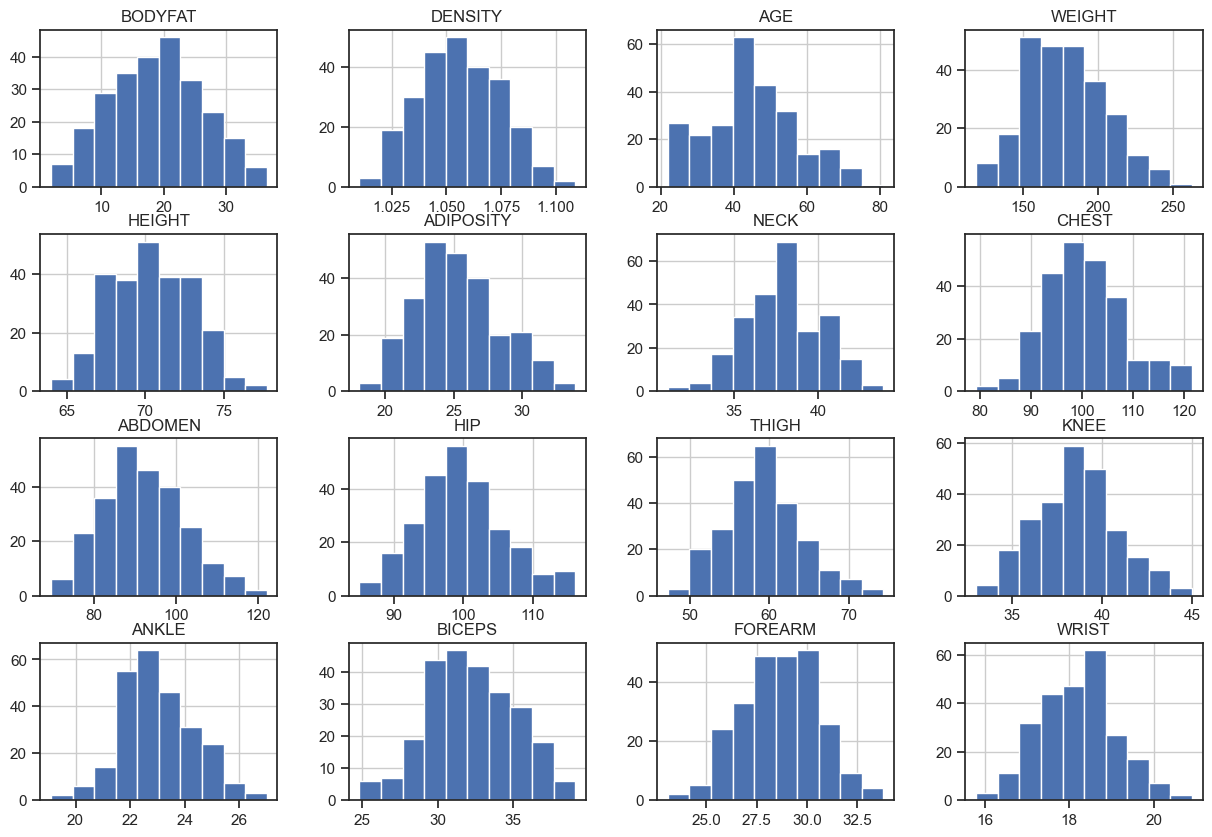

In [97]:
df.hist(figsize=(15, 10)) # hist after replace

In [ ]:
'''IQR method
def find_outliers_IQR(df):
    q1=df.quantile(0.2)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers
    
    find_outliers_IQR(df["BODYFAT"])
    
    outlier_dict = {}
for feature in cols:
    outlier_dict[feature] = find_outliers_IQR(df[feature])
outlier_dict'''